# 第三问预测

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lightgbm import LGBMClassifier

from mlxtend.classifier import StackingClassifier
from mlxtend.classifier import StackingCVClassifier

from sklearn.svm import SVC
from sklearn import metrics

from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier as ada
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import roc_auc_score,precision_score,recall_score

In [13]:
#  Voting
data = pd.read_csv('./excel/extract/3/第三问特征提取.csv',
                   encoding='gbk')

x = data.iloc[:, 1:].values

scaler = StandardScaler()
x= scaler.fit_transform(x)

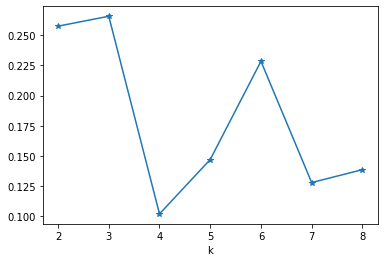

In [22]:
#肘部法
from sklearn. cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
inertia=[]
si1_score=[]
for k in range(2,9) :
    kmeans=KMeans(n_clusters=k, random_state=0).fit(x)
    inertia.append(np.sqrt(kmeans.inertia_))
    si1_score.append(silhouette_score(x,kmeans.labels_))
# plt.plot(range(2,9) , inertia, 'o-')
plt.plot(range(2,9) , si1_score, '*-')
plt.xlabel('k')
# plt.savefig('./excel/result/3/肘部法.png')
plt.savefig('./excel/result/3/轮廓系数.png')
plt.show()


#  聚类结果后特征描述性统计分析

In [33]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(x)
data['聚类类别'] = kmeans.labels_ + 1
data.to_csv('./excel/result/3/第三问最终聚类结果.csv', encoding='gbk')
data.head()

A = data[data['聚类类别']==1]
B = data[data['聚类类别']==2]
A.describe().loc[['count', 'mean', 'min',
                  'max']].to_csv('./excel/result/3/类别1描述.csv', encoding='gbk')
B.describe().loc[['count', 'mean', 'min',
                  'max']].to_csv('./excel/result/3/类别2描述.csv', encoding='gbk')
A.head()

,企业代号,销-进金额,增值税,持续一年期的交易企业个数,持续二年期的交易企业个数,持续三年期的交易企业个数,持续四年前的交易企业个数,持续一年期的交易企业个数.1,持续二年期的交易企业个数.1,持续三年期的交易企业个数.1,...,较2019二月增长率,一月废票占比变动,二月废票占比变动,一月交易企业数量变动率,二月交易企业数量变动率,小,中,微,行业评分,聚类类别
0,E124,-3.646980e+07,0.00,919,352,132,0,22,18,12,...,-1.0,-1.0,-1.0,-1.0,-1.0,1,0,0,2,1
1,E125,1.947530e+06,15344245.88,1213,417,159,0,28,26,9,...,-1.0,-1.0,-1.0,-1.0,-1.0,0,1,0,2,1
2,E126,5.115072e+08,4795532.77,50,17,5,0,96,34,13,...,-1.0,-1.0,0.0,-1.0,-1.0,1,0,0,2,1
3,E127,6.950971e+08,20794844.85,229,50,17,0,12,7,6,...,-1.0,-1.0,-1.0,-1.0,-1.0,0,1,0,2,1
4,E128,2.453806e+08,8473701.96,404,101,25,0,4,2,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,1,0,0,2,1
